## 各ライブラリのバージョン確認

In [1]:
import sys
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
import numpy as np
np.version.full_version

'1.18.1'

In [3]:
import scipy as sp
sp.version.full_version

'1.4.1'

In [4]:
import sklearn
sklearn.__version__

'0.22.1'

In [5]:
import pandas as pd
pd.__version__

'1.0.1'

In [6]:
import matplotlib
matplotlib.__version__
# 利用時のインポートは別途

'3.1.3'

In [7]:
import seaborn as sns
sns.__version__

'0.10.0'

# 単回帰分析

## データの準備
### Pandasによる読み込み

・DLしたExcelファイルをJupyter Notebookに読み込む  
・データの取り扱いに優れたpandasを用いる  
・Excelファイルを読み込むときはのようなread_excel()関数を用いる  
（データがcsvファイルとして保存してある場合はread_csv()関数）  
・ファイルはpandasのDataFrame型として読み込まれる

### person_income_data.xlsx
政府統計の総合窓口（e-Stat）より  
社会・人口統計体系→統計でみる市区町村のすがた2020→基礎データ→<a href="https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200502&tstat=000001141146&cycle=0&tclass1=000001141147">経済基盤</a>  
<a href="https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031956085&fileKind=0">元データのダウンロードリンク</a>

この中から「市区町村」、「課税対象所得（Taxable income）」、「従業者数（Number of persons engaged）」を抜き出し、整理したもの。

In [8]:
df = pd.read_excel('person_income_data.xlsx')

In [9]:
# 正しく読み込まれたことを確認
df.head()

,Prefecture,N_Person,N_Income
0,北海道,2445372,6863677
1,青森県,575797,1432488
2,岩手県,595288,1483561
3,宮城県,1100860,3241087
4,秋田県,465227,1094831


### NumPyによる変換
pandasのDataFrame型のデータを､numpyのarray型に変換する  
（scikit-learnの取り扱いのため）

なお、今回は従業員数から所得を予測するので､従業員数を説明変数としてXに､所得を目的変数としてYに格納していきます。

In [10]:
# locメソッドで列を指定できる
df.loc[:, ['N_Person']].head()

,N_Person
0,2445372
1,575797
2,595288
3,1100860
4,465227


In [11]:
# 従業員数のデータをarrayに変換してXに格納
X = np.array(df.loc[:, ['N_Person']])

In [12]:
# 変換されたことを確認
X[:5]

array([[2445372],
       [ 575797],
       [ 595288],
       [1100860],
       [ 465227]])

In [13]:
# Yも同様に
Y = np.array(df.loc[:, ['N_Income']])
Y[:5]

array([[6863677],
       [1432488],
       [1483561],
       [3241087],
       [1094831]])

## データの観察

### データの可視化
可視化をすることでデータの全体的な傾向を視覚的に捉えることができる。  
まずは、matplotlibを用いて散布図により

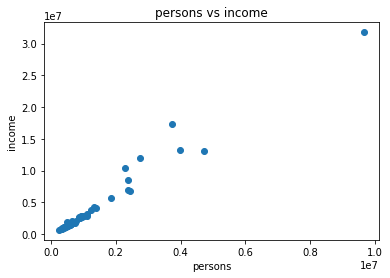

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# 散布図を表示
plt.scatter(X, Y)
# タイトルを表示
plt.title('persons vs income')
# x軸のラベルを表示
plt.xlabel('persons')
# y軸のラベルを表示
plt.ylabel('income')
# 指定した内容でグラフを出力
plt.show()

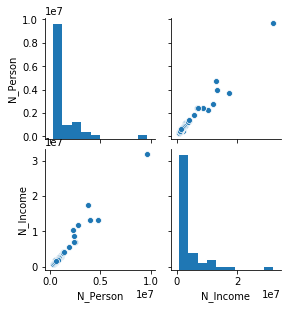

In [15]:
# 参考
# seabornを使うと散布図をまとめて出力できて便利
# matplotlibをforで回しても良いけど...
sns.pairplot(df, height=2.0)
plt.show()

### 相関係数のチェック

相関係数をチェックすることで単回帰分析を用いるべきかどうかが判断できる
（0に近いほど相関が弱く、1 or -1に近いほど相関が強い）

In [16]:
# 相関係数行列を確認
df.corr()

,N_Person,N_Income
N_Person,1.000000,0.981137
N_Income,0.981137,1.000000


## テストデータの分割

学習用データとテストデータを分割することで、モデルの汎化性能を確認する。

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
# test_sizeを変更することで容易に分割の割合を変更できる

In [18]:
# データ全体のサンプル数を確認
print(X.shape)
print(Y.shape)
# trainデータのサンプル数を確認
print(X_train.shape)
print(Y_train.shape)
# testデータのサンプル数を確認
print(X_test.shape)
print(Y_test.shape)

(47, 1)
(47, 1)
(42, 1)
(42, 1)
(5, 1)
(5, 1)


## 線型モデルの構築

### 線型モデルの学習

In [19]:
# 線形回帰のインスタンスを生成
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 線型回帰モデルを学習
from sklearn.model_selection import learning_curve
lc = learning_curve(lr, X_train, Y_train)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### モデルの解釈

線型モデル$y = w_0 + w_1x_1$の$w_0$と$w_1$を求める

In [20]:
lr.intercept_

array([-312554.76998125])

In [21]:
lr.coef_

array([[3.43529026]])

つまり回帰式はおよそ以下のようになる。
$$\begin{align}
y &= w_0 + w_1x_1\\
&= -312554+ 3.43x_1
\end{align}$$

## 線型モデルの確認

### 線型モデルの可視化

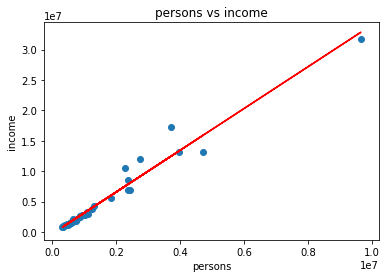

In [22]:
# 線型モデルを表示
plt.plot(X_train, lr.predict(X_train), color='red')

# 以下は同様
plt.scatter(X_train, Y_train)
plt.title('persons vs income')
plt.xlabel('persons')
plt.ylabel('income')
plt.show()

### 回帰式の活用
予測モデルとして活用してみると任意の従業員数から所得が導くことができることがわかる

In [23]:
# 任意の従業員数を設定
persons_1 = np.array([[1700000]])

# 所得を推定
lr.predict(persons_1)

array([[5527438.66359541]])

## モデルの評価

決定係数$R^2$を用いてモデルの評価を行う

In [24]:
#ただし、単回帰分析では相関係数と同じ結果になる
print('train: %.3f' % lr.score(X_train, Y_train))
print('test : %.3f' % lr.score(X_test, Y_test))

train: 0.962
test : 0.931
